In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from tools import (Config, system, tau_leap, sys_birth, sys_death, 
                   tau_leap_symbiosis_mutation, tau, turn_raw_dat_to_sorted_arrays)

In [19]:
cg_eco = Config(dict(mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1, 
                     r = 2.3, d = 1.3, rho = 3.6, tau = 1.1008, nu = -0.2))
cg_evo =  Config(dict(eta = 1., g = 0.312, mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1, 
                      r = 2.3, d = 1.3, theta = 8., v = 1., h = 1.5, nu_max = 3))
init = np.array([0.1, 1., 0.2])
tseries = np.linspace(0, 10, 300)

In [20]:
d = odeint(system, init, tseries, args=(cg_eco,))

In [21]:
np.random.seed(1)
V = 100
ds = tau_leap(init * V, sys_birth, sys_death, 1000, 1, cg_eco, V)

In [22]:
np.random.seed(1)
ds_test = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 1000, dt = 1, cg = cg_evo, V = V, 
                                       trait_init = np.array([3.6, -0.2]), sigma_rho = 0.2, sigma_nu = 0.2, 
                                       mutant_rate = 0, step = 1)

In [23]:
tau(np.array([3.6]), np.array([-0.2]), cg_evo)

array([1.10080137])

(0.0, 2.0)

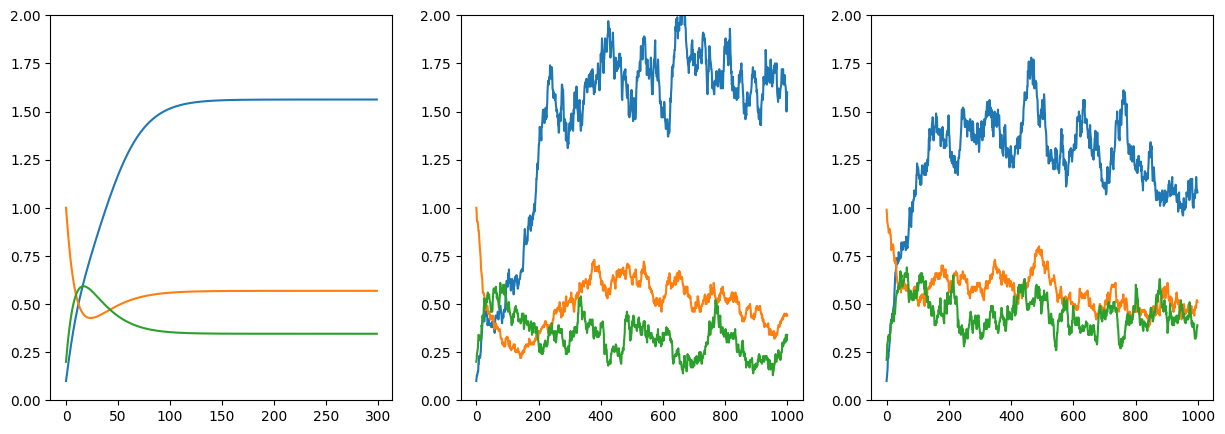

In [24]:
clist = ["C0", "C1", "C2"]
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i in range(3):
  axes[0].plot(d[:, i], color = clist[i])
  axes[0].set_ylim(0, 2)
  axes[1].plot(ds['x'][:, i]/V, color = clist[i])
  axes[1].set_ylim(0, 2)
axes[2].plot(ds_test["t"], np.array(ds_test["x_F"])/V,
          color = "C0")
axes[2].plot(np.array(ds_test["x_A"])/V, color = "C1")
axes[2].plot(np.array(ds_test["x_H"])/V, color = "C2")
axes[2].set_ylim(0, 2)


In [25]:
cg_evo_1 =  Config(dict(eta = 1., g = 0.312, mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1,
                        r = 2.3, d = 1.3, theta = 8., v = 1., h = 1.5, nu_max = 3))

In [ ]:
np.random.seed(2)
V = 100
ds_1 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 2000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([2, -0.5]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.001, step = 200)

/Users/phuongnguyen/Work/symbiosis_3D_tradeoff/tools.py:143: RuntimeWarning: invalid value encountered in power
  return cg.theta - cg.v * rho**cg.h + (cg.eta * nu * (nu + cg.d) ** cg.g) / cg.nu_max


In [ ]:
dss_1 = turn_raw_dat_to_sorted_arrays(ds_1)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

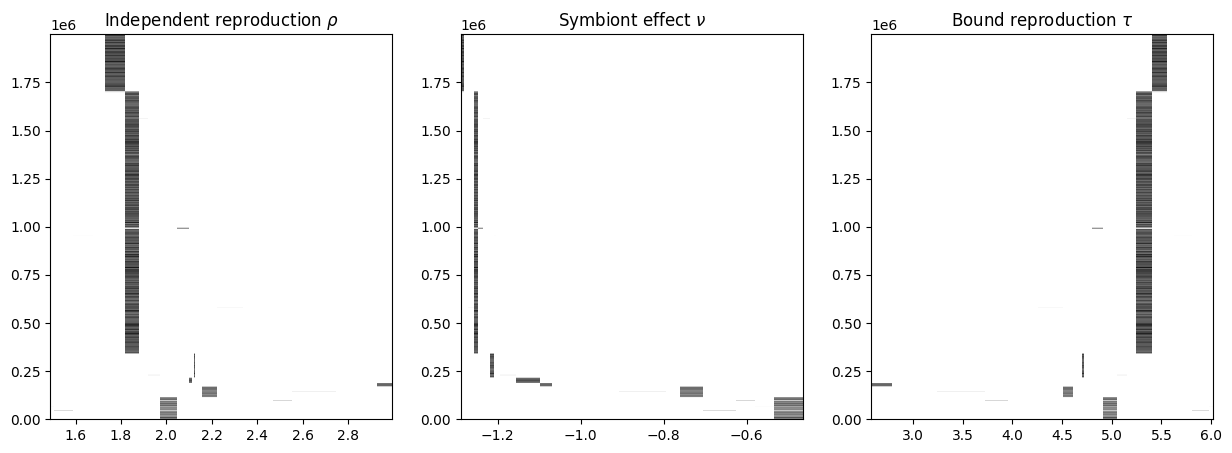

In [ ]:
popmin_thres = 20
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_1["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["rho_sort"][cc[0]], ds_1["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_1["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["nu_sort"][cc[0]], ds_1["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_1["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_1["tau_sort"][cc[0]], ds_1["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")

In [ ]:
np.random.seed(10)
V = 200
ds_1_init_2 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 2000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([3, 1]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.005, step = 10)

In [55]:
dss_1_init_2 = turn_raw_dat_to_sorted_arrays(ds_1_init_2)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

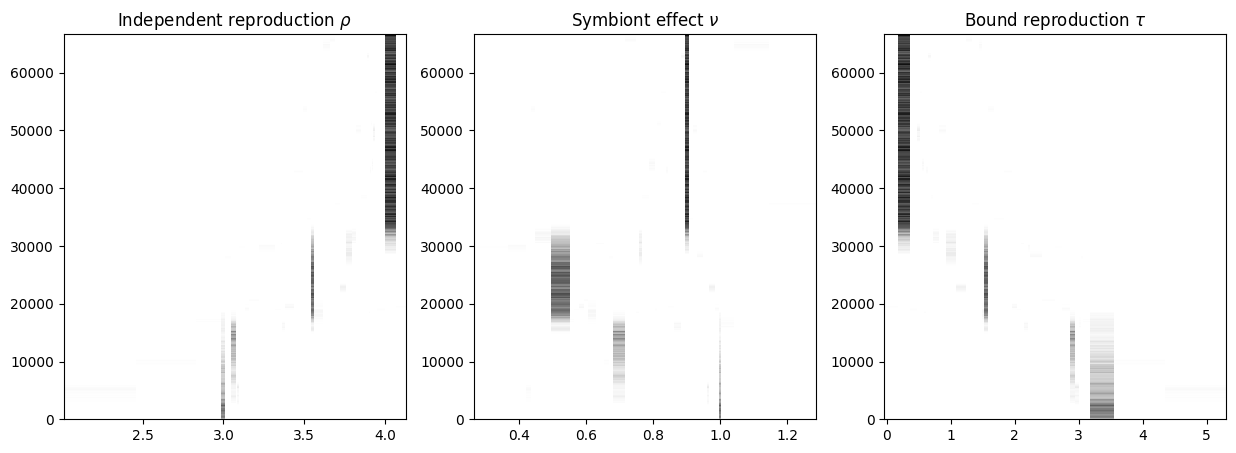

In [57]:
popmin_thres = 10
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_1_init_2["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1_init_2["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_1_init_2["rho_sort"][cc[0]], ds_1_init_2["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_1_init_2["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1_init_2["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_1_init_2["nu_sort"][cc[0]], ds_1_init_2["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_1_init_2["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_1_init_2["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_1_init_2["tau_sort"][cc[0]], ds_1_init_2["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")